In [119]:
from Bio import SeqIO, AlignIO
from Bio.Align import MultipleSeqAlignment
from collections import Counter
from sklearn.externals import joblib
from sklearn.preprocessing import LabelBinarizer

import custom_funcs as cf
import pandas as pd
import numpy as np

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
pol = [s for s in SeqIO.parse('HIV-1_pol.fasta', 'fasta')]
len(pol)

159134

In [113]:
lengths = Counter([len(s.seq) for s in pol])
mc_len = lengths.most_common(1)[0][0]

In [114]:
# Filter to only the "most common" lengths.
pol_filtered = [s for s in pol if len(s.seq) == mc_len]
len(pol_filtered)

23163

In [117]:
subtypes = []
countries = []
years = []

for s in pol_filtered:
    id = s.id.split('.')
    subtypes.append(id[0])
    countries.append(id[1])
    years.append(id[2])

In [118]:
# Load binarizer
alignment = MultipleSeqAlignment(pol_filtered)
alignment = pd.DataFrame(np.array([list(s) for s in alignment]))
alignment['subtypes'] = subtypes
alignment['countries'] = countries
alignment['years'] = years
alignment = alignment.replace({'X':np.nan})
alignment.dropna(inplace=True)
alignment

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,subtypes,countries,years
0,P,Q,I,T,L,W,Q,R,P,L,...,I,G,C,T,L,N,F,-,JP,-
1,P,H,I,T,L,W,Q,R,P,L,...,I,G,C,T,L,N,F,-,JP,-
2,P,Q,I,T,L,W,Q,R,P,L,...,I,G,C,T,L,N,F,-,JP,-
3,P,Q,I,T,L,W,Q,R,P,L,...,I,G,C,T,L,N,F,-,JP,-
4,P,Q,I,T,L,W,Q,R,P,R,...,L,G,C,T,L,N,F,-,JP,-
5,P,H,I,T,L,W,Q,R,P,I,...,I,G,C,T,L,N,F,-,JP,-
6,P,Q,I,T,L,W,Q,R,P,I,...,I,G,C,T,L,N,F,-,JP,-
7,P,Q,I,T,L,W,Q,R,P,I,...,L,G,C,T,L,N,F,-,JP,-
8,P,Q,I,T,L,W,Q,R,P,L,...,I,G,C,T,L,N,F,-,JP,-
9,P,Q,I,T,L,W,Q,R,P,L,...,I,G,C,T,L,N,F,-,JP,-


In [121]:
seq_cols = np.arange(0, 99)
X_test = alignment[seq_cols]
X_meta = alignment[['subtypes', 'countries', 'years']]

In [126]:
lb = LabelBinarizer()
lb.fit(list('CHIMSVAGLPTRFYWDNEQK'))

X_binarized = pd.DataFrame()

for col in X_test.columns:
    binarized_cols = lb.transform(X_test[col])
    
    for i, c in enumerate(lb.classes_):
        X_binarized[str(col+1) + '_' + str(c)] = binarized_cols[:,i]
X_binarized

,1_A,1_C,1_D,1_E,1_F,1_G,1_H,1_I,1_K,1_L,...,99_M,99_N,99_P,99_Q,99_R,99_S,99_T,99_V,99_W,99_Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
# Load models
net1 = joblib.load('models/FPV nnet1.pkl')
rfr = joblib.load('models/FPV rfr.pkl')
gbr = joblib.load('models/FPV gbr.pkl')

In [133]:
# Make predictions
net1_preds = net1.predict(X_binarized)
rfr_preds = rfr.predict(X_binarized)
gbr_preds = gbr.predict(X_binarized)

In [160]:
# Add in metadata to prediction
preds = pd.DataFrame()
preds['countries'] = alignment['countries']
preds['years'] = alignment['years']
preds['subtypes'] = alignment['subtypes']
preds['Neural Network'] = net1_preds
preds['Random Forest'] = rfr_preds
preds['Gradient Boosting'] = gbr_preds

# Further cleaning
preds['years'] = preds['years'].replace({'-':np.nan})
preds['years'].fillna(0, inplace=True)

/home/ericmjl/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


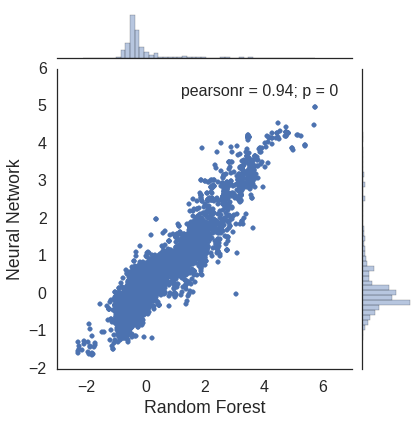

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('poster')
sns.set_style('white')
%matplotlib inline

fig = plt.figure(figsize=(5,5))
sns.jointplot(x=preds['Random Forest'], y=preds['Neural Network'])
plt.savefig('figures/global.rfr-vs-nnet.pdf')

/home/ericmjl/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


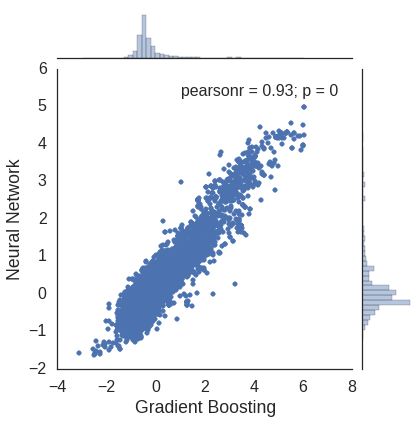

In [164]:
fig = plt.figure(figsize=(5,5))
sns.jointplot(x=preds['Gradient Boosting'], y=preds['Neural Network'])
plt.savefig('figures/global.gbr-vs-nnet.pdf')